# One Compartmental Oral PK Model

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks

## PK Parameters

In [10]:
Dose = 40 # mg
Vd = 60 # L
Cl = 13.86 # L/h
F = 0.45
ka = 2.04 # /h
tau = 24 # h

## Max Time

In [11]:
max_t = 72 # h

## Model

In [21]:
# zero order drug 'infusion' into depot within short duration to mimic instant addition of dose
def add_dose(t):
    if t % tau <= 0.001:
        return Dose / 0.001
    else:
        return 0

def model(result, t):
    A, C = result

    dAdt = - ka * A + add_dose(t)
    dCdt = ka * A * F - Cl / Vd * C
    
    return [dAdt, dCdt]

In [13]:
t = np.linspace(0, max_t, 100000)
C = odeint(model, [0, 0], t, tcrit=t)

## Plot: Concentration versus Time

Text(0.5, 1.0, 'Concentration vs Time')

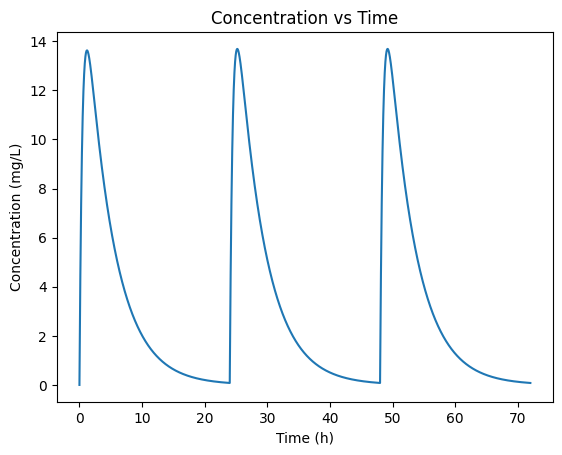

In [14]:
plt.plot(t, C[:, 1])
plt.ylabel('Concentration (mg/L)')
plt.xlabel('Time (h)')
plt.title('Concentration vs Time')

## Derived Parameters: $C_{max}$, $T_{max}$

In [16]:
peaks = find_peaks(C[:, 1])[0]

# Cmax
for index, peak in enumerate(peaks):
    print(f'Dose {index + 1} Cmax Tmax {C[peak, 1]} mg/L {t[peak]} h')

Dose 1 Cmax Tmax 13.629214799255223 mg/L 1.2045720457204572 h
Dose 2 Cmax Tmax 13.689337360551729 mg/L 25.20241202412024 h
Dose 3 Cmax Tmax 13.689573298198802 mg/L 49.202412024120235 h


## Derived Parameters: $C_{min}$, $T_{min}$

In [17]:
troughs = find_peaks(-C[:, 1])[0]

for index, trough in enumerate(troughs):
    print(f'Dose {index + 1} Cmin Tmin {C[trough, 1]} mg/L {t[trough]} h')

Dose 1 Cmin Tmin 0.07939362979864341 mg/L 24.0 h
Dose 2 Cmin Tmin 0.07970412280676972 mg/L 48.0 h


## Derived Parameter: $AUC$

In [18]:
AUC = np.trapz(C[:, 1], t) # composite trapzodial
print(f'AUC {AUC} mgh/L')

AUC 233.42118520466911 mgh/L


## Plot: Dose Remaining versus Time

Text(0.5, 1.0, 'Dose Remaining vs Time')

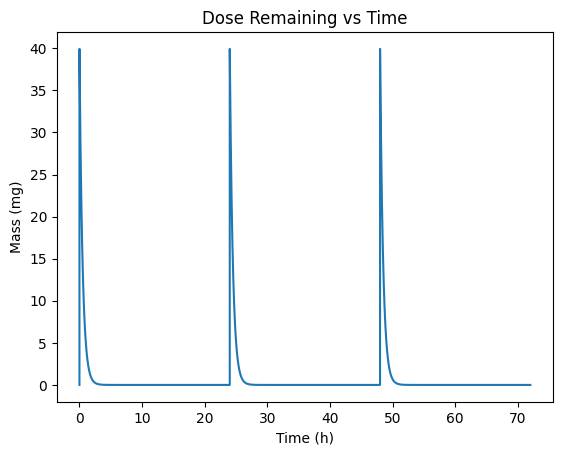

In [19]:
plt.plot(t, C[:, 0])
plt.ylabel('Mass (mg)')
plt.xlabel('Time (h)')
plt.title('Dose Remaining vs Time')